# Finding Mohamed Salah's Historical Goal Record via FPL Endpoints

## Introduction
I recently came across this [article](https://medium.com/@frenzelts/fantasy-premier-league-api-endpoints-a-detailed-guide-acbd5598eb19) by Frenzel Timothy that describes how to access API endpoints that give you official current and historical Premier League data that is used in Fantasy Premier League (FPL). The following Jupyter Notebook describes how this data can be used to identify Mohamed Salah's historical goal-scoring record for every year that he's played in the Premier League.
<div>
    <br/>
<img src="https://e0.365dm.com/22/01/768x432/skysports-mohamed-salah-liverpool_5638215.jpg?20220111105345" width="300"/>
</div>

## Imports
Start by importing the `requests`, `pandas` and `matplotlib` modules (Note: The `%matplotlib inline` code just ensures that any plots we create show up right here in the Notebook). Remember, these can be installed by using the `pip install {module}` command in the terminal.

In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Finding Salah's Unique ID
Fortunately Timothy already explained which endpoint points to which data and so I knew that eventually I would need to use the endpoint Timothy describes as the _Player’s Detailed Data_ (https://fantasy.premierleague.com/api/element-summary/{element_id}/) to hone in on Salah's historical data. The trouble with this endpoint though, is that in order to access individual player data, you first need to locate the unique ID for a specific player and replace _{element_id}_ with it in the endpoint above.

The _General Information_ endpoint gives us the opportunity to find such an ID. First use `requests.get()` method to obtain a raw response back from the API. The response has a `.json()` method that can be used to convert the response into a useable JSON object (or Python dictionary).

In [2]:
general_information = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/').json()

Timothy already explains in his Medium post that you can obtain information on all Premier League players by navigating to the `elements` key of the json dictionary. We can check which keys are available by using `.keys()` method on the JSON object.

In [3]:
general_information.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

We see that `elements` is one of the keys in the JSON object and so we create a variable called `player_df` and convert the player data stored under `elements` into a Pandas DataFrame (read more about DataFrames [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)).

In [4]:
player_df = pd.DataFrame(general_information['elements'])

In [5]:
player_df

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,100.0,100.0,58822,0,0,-3,3,0,2,0.0,...,558,156,451,174,394,145,400,150,0.00000,0.00000
1,NaN,NaN,84450,0,0,1,-1,1,3,3.0,...,174,100,115,48,45,18,91,29,1.06546,0.43872
2,100.0,100.0,153256,0,0,-3,3,1,3,0.7,...,565,293,264,125,365,159,196,61,0.81081,0.00000
3,NaN,NaN,156074,0,0,-3,3,0,2,0.3,...,566,162,312,106,398,149,420,157,0.00000,0.00000
4,100.0,100.0,167199,0,0,-2,2,0,3,2.0,...,262,157,162,67,107,50,249,82,1.03960,0.59406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,0.0,100.0,476502,0,0,-1,1,0,3,0.0,...,496,263,521,195,333,141,480,185,0.94737,0.00000
683,NaN,NaN,531363,0,0,0,0,0,4,0.0,...,422,78,588,64,644,77,472,63,0.00000,0.00000
684,NaN,NaN,449133,0,0,0,0,0,3,0.0,...,382,211,557,215,616,249,629,254,0.00000,0.00000
685,NaN,NaN,492776,0,0,0,0,0,2,0.0,...,636,204,437,164,390,141,608,220,0.00000,0.00000


Now that we have the player data in a Pandas Dataframe, we can use some of the built-in DataFrame methods to quickly locate Salah's unique ID.

In [6]:
salah_id = player_df[player_df['second_name'] == 'Salah']['id'].values[0]

In [7]:
salah_id

283

## Locating Salah's Historical Goal Record
Now we have Salah's unique ID, we can make a request to the _Player's Detailed Data_ endpoint and explore Salah's historical data deeper.

In [8]:
salah_historical = requests.get(f'https://fantasy.premierleague.com/api/element-summary/{salah_id}/').json()

Again, we know from the Medium post that we're looking for data underneath a key called `history_past`. We can once again check to see whether this key is available by using the `.keys()` method.

In [9]:
salah_historical.keys()

dict_keys(['fixtures', 'history', 'history_past'])

Once we have identified the correct key, we can use it to store the appropriate data into a Pandas Dataframe.

In [10]:
salah_history_df = pd.DataFrame(salah_historical['history_past'])

In [11]:
salah_history_df

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,2013/14,118748,65,55,31,501,2,1,2,2,...,25,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000
1,2014/15,118748,65,60,3,33,0,0,0,3,...,5,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000
2,2017/18,118748,90,106,303,2905,32,12,15,29,...,881,1496.2,942.5,2109.0,454.4,0,0.00000,0.00000,0.00000,0.00000
3,2018/19,118748,130,132,259,3254,22,12,21,20,...,687,1186.8,973.9,2168.0,432.7,0,0.00000,0.00000,0.00000,0.00000
4,2019/20,118748,125,125,233,2879,19,10,16,26,...,661,1061.2,834.8,2156.0,405.1,0,0.00000,0.00000,0.00000,0.00000
5,2020/21,118748,120,129,231,3077,22,6,11,41,...,657,1056.0,825.7,1980.0,385.8,0,0.00000,0.00000,0.00000,0.00000
6,2021/22,118748,125,131,265,2758,23,14,17,22,...,756,1241.0,875.9,2230.0,434.8,0,0.00000,0.00000,0.00000,0.00000


In [12]:
salah_history_df[['season_name','goals_scored']]

,season_name,goals_scored
0,2013/14,2
1,2014/15,0
2,2017/18,32
3,2018/19,22
4,2019/20,19
5,2020/21,22
6,2021/22,23


## Matplotlib Plot
Finish off with some data visualisation :) (read more about using Matplotlib with Jupyter Notebook [here](https://www.tutorialspoint.com/jupyter/jupyter_notebook_plotting.htm#:~:text=IPython%20kernel%20of%20Jupyter%20notebook,plot%20object%20is%20not%20called).

Text(0, 0.5, 'Goals')

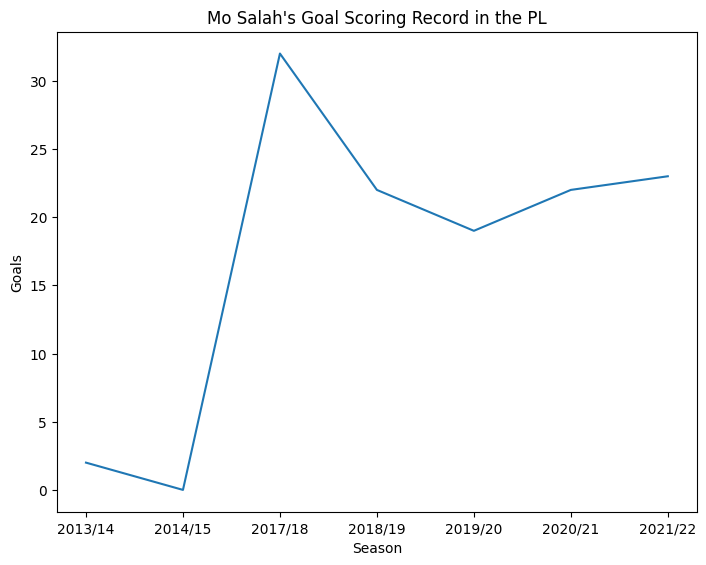

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(salah_history_df['season_name'], salah_history_df['goals_scored'])
ax.set_title('Mo Salah\'s Goal Scoring Record in the PL')
ax.set_xlabel('Season')
ax.set_ylabel('Goals')